In [47]:
import matplotlib.pyplot as plt
import math
import numpy as np
from time import time
plt.rcParams.update({'font.size': 16})
from matplotlib import rcParams
pi = math.pi



## <center> Functions Used for Fourier Analysis </center>  

In [48]:
def a_n(n):
    a = math.sin(n*pi / 2)*( (-6/(n*pi) - (32 / (n**3 * pi**3) ) ) ) \
    + (16 / (n**2 * pi**2)) * ( math.cos((n*pi)/2) + (2*(-1)**n))
    return a

def b_n(n):
    b = (6*(-1)**n)/(n*pi) + (6*math.cos((n*pi)/2))/(n*pi) \
    - (32*(-1)**n)/(n**3 * pi**3) + (32*math.cos((n*pi)/2))/(n**3 * pi**3) \
    + (16*math.sin((n*pi)/2)) / (n**2 * pi**2)
    return b 

def fourier(a_coeff, b_coeff, x_input, interval_length, a_0=0, ):
    
    total = 0
    y_output = np.zeros(x_input.shape[0])
    coefficient_size = len(a_coeff)

    for counter, x in enumerate(x_input):
        # print('counter is:', counter, '\nx is: ', x, )

        for i in range(coefficient_size):
            total += a_coeff[i] * math.cos((i + 1) * x * 0.5 * pi) + b_coeff[i] * math.sin((i + 1) * x * 0.5 * pi)
            
        y_output[counter] = (a_0/2) + total
        total = 0  # rest total
    return y_output


    

##  <center> Function to Approximate  </center> 

  $$ f(x) =   \left\{
\begin{array}{ll}
      4x^2 -7,   & -2 \leq x \leq 1 \\
      3,         & 1 < x \leq 2 \\
\end{array} 
\right.  $$


In [49]:
def y_function(x):  
    y_x = 4*x**2 - 7
    return y_x

In [50]:
vector_a = np.vectorize(a_n)
vector_b = np.vectorize(b_n)
vector_y = np.vectorize(y_function)

interval_length = 2
a_0 = -3

x_domain = np.linspace(-2, 2, 1000)  # iterated x_domain from -2 to 2

y_function_1_piece = vector_y(x_domain[x_domain <= 1])  # piece-wise part 1
y_function_2_piece = np.where(x_domain[x_domain > 1], 3, x_domain[x_domain > 1])  # piece-wise part 2
                                       
y_concat = np.concatenate(( y_function_1_piece, y_function_2_piece), axis=None)  # combine piecewise function


coefficients_to_plot = [5, 101]  # number terms in Fourier Series


In [51]:
linestyles=['solid', 'dashed', 'dashdot', 'dotted']
colors = ['r', 'b']

## <center> Fourier Approximate and Function Plot </center> ##

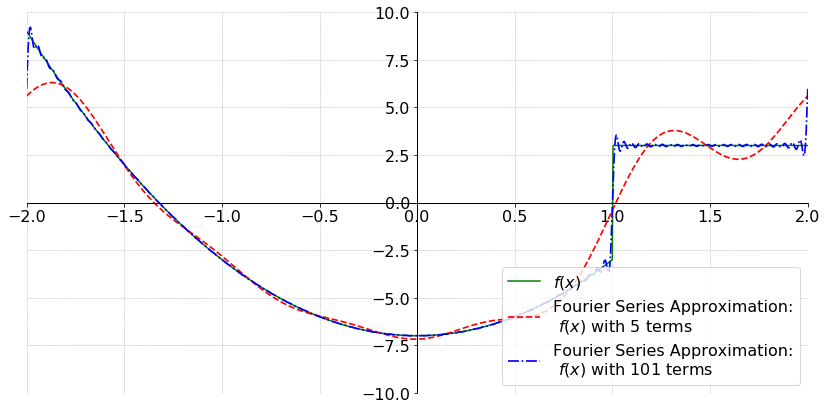

In [52]:


fig, ax = plt.subplots(ncols=1, figsize=(14, 7))
ax.set_ylim((-10, 10))
ax.set_xlim((-2, 2))
ax.plot(x_domain, y_concat, color='g',label=r'$f(x)$',  linewidth=1.5)

for i, number_of_coeff in enumerate(coefficients_to_plot):
    
    n = np.arange(1,number_of_coeff + 1, 1, dtype=np.int32)
    a = vector_a(n)  #  terms are generated
    b = vector_b(n)
    y_estimates = fourier(a, b, x_domain,interval_length ,a_0)

    ax.plot(x_domain, y_estimates, color=colors[i], linewidth=1.7, linestyle=linestyles[i+1],label=f'Fourier Series Approximation:\n $f(x)$ with {number_of_coeff} terms'  )

ax.axhline(linewidth=1, color='k')
ax.axvline(linewidth=1, color='k')


ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.spines['left']
ax.spines['bottom']

ax.legend(loc='lower right')

ax.grid(linestyle='--', linewidth=0.5)

plt.savefig('HW5_Problem_5.pdf', bbox_inches="tight")
plt.show()